This notebook contains an analysis workflow for plotting refinement results from MAUD batch mode (http://maud.radiographema.eu/) and extracting crystallographic texture data for analysis using the MTEX toolbox in MATLAB (https://mtex-toolbox.github.io)

## Import packages

In [4]:
import pathlib
import re

from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Plotting refinement results

Read in results of the fit from the text file:

In [5]:
# user inputs

# test number
#test_number = 103845
test_number = 65

# which phase is being refined?
phase = 'alpha'
#phase = 'beta'

# number of refinement iterations
#number_of_iterations = 5
number_of_iterations = 20

In [6]:
#results_file = f'../analysis/diamond_2021/{test_number:06d}-stage-scan/15deg/results/batch_results_{test_number:06d}_{phase}_{number_of_iterations}iter.txt'
results_file = f'../analysis/diamond_2017/{test_number:03d}_15deg/results/batch_results_{test_number:03d}_{phase}_{number_of_iterations}iter.txt'

results = np.loadtxt(results_file, usecols = np.arange(0,19), dtype='str', skiprows = 1)

Read in the data headers:

In [7]:
with open (results_file) as file:
    header = file.readline().split()
    for i in range(0, len(header)):
        print('header column ', i ,' = ', header[i])

header column  0  =  Title
header column  1  =  Rwp(%)
header column  2  =  Phase_Name
header column  3  =  Vol.(%)
header column  4  =  error(%)
header column  5  =  Wt.(%)
header column  6  =  error(%)
header column  7  =  Cell_Par(Angstrom)
header column  8  =  Cell_Par(Angstrom)
header column  9  =  Size(Angstrom)
header column  10  =  Microstrain
header column  11  =  Phase_Name
header column  12  =  Vol.(%)
header column  13  =  error(%)
header column  14  =  Wt.(%)
header column  15  =  error(%)
header column  16  =  Cell_Par(Angstrom)
header column  17  =  Size(Angstrom)
header column  18  =  Microstrain


Write the results of the fit to new arrays:

In [8]:
title = results[:,0]
R_wp = results[:,1].astype(np.float)
phase = results[0,2]
volume = results[:,3].astype(np.float)
vol_error = results[:,4].astype(np.float)
weight_percent = results[:,5].astype(np.float)
weight_error = results[:,6].astype(np.float)
cell_par_a = results[:,7].astype(np.float)
cell_par_c = results[:,8].astype(np.float)
size = results[:,9].astype(np.float)
microstrain = results[:,10].astype(np.float)
phase2 = results[0,11]
volume2 = results[:,12].astype(np.float)
vol_error2 = results[:,13].astype(np.float)
weight_percent2 = results[:,14].astype(np.float)
weight_error2 = results[:,15].astype(np.float)
cell_par_a2 = results[:,16].astype(np.float)
size2 = results[:,17].astype(np.float)
microstrain2 = results[:,18].astype(np.float)

Get the test numbers from the data names:

In [9]:
test_number = []

for test_name in title:   
    test_num = ''.join(re.findall(r'\D(\d{5})\D', test_name))
    test_number.append(int(test_num))

print('test_number =', test_number)

test_number = [3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3178, 3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199, 3200, 3201, 3202, 3203, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224, 3225, 3226, 3227, 3228, 3229, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258, 3259, 3260, 3261, 3262, 3263, 3

Plotting parameters:

In [10]:
plt.rc('xtick', labelsize = 24)
plt.rc('ytick', labelsize = 24)
plt.rc('legend', fontsize = 20)
plt.rc('axes', linewidth = 2)
plt.rc('xtick.major', width = 2, size = 10)
plt.rc('xtick.minor', width = 2, size = 5)
plt.rc('ytick.major', width = 2, size = 10)
plt.rc('ytick.minor', width = 2, size = 5)

Plot the goodness of fit (R<sub>wp</sub>) values:

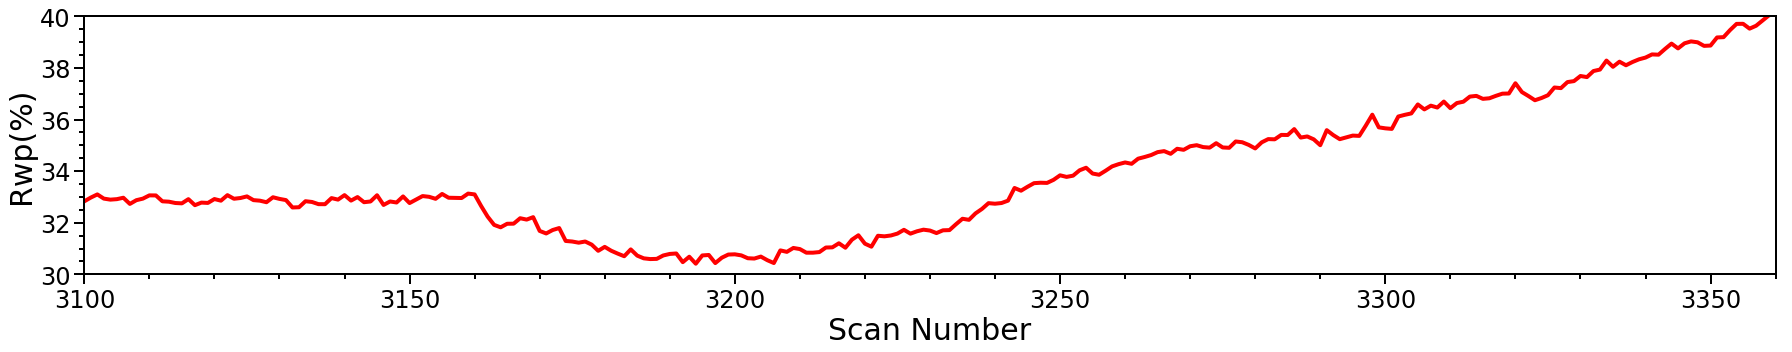

In [66]:
plt.figure(figsize=(25,5))
plt.plot(test_number, R_wp, color = 'red', linewidth = 4)
#plt.title(header[1], fontsize = 30)
plt.xlim(3100,3360)
plt.ylim(30,40)
plt.xlabel('Scan Number', fontsize = 30)
plt.ylabel(header[1], fontsize = 30)
plt.minorticks_on()
plt.tight_layout()
plt.savefig("../results/diamond_2017/065_15deg/Rwp.png")

Plot the volume, weight percent, a and c cell parameter, size and microstrain for the $\alpha$ phase:

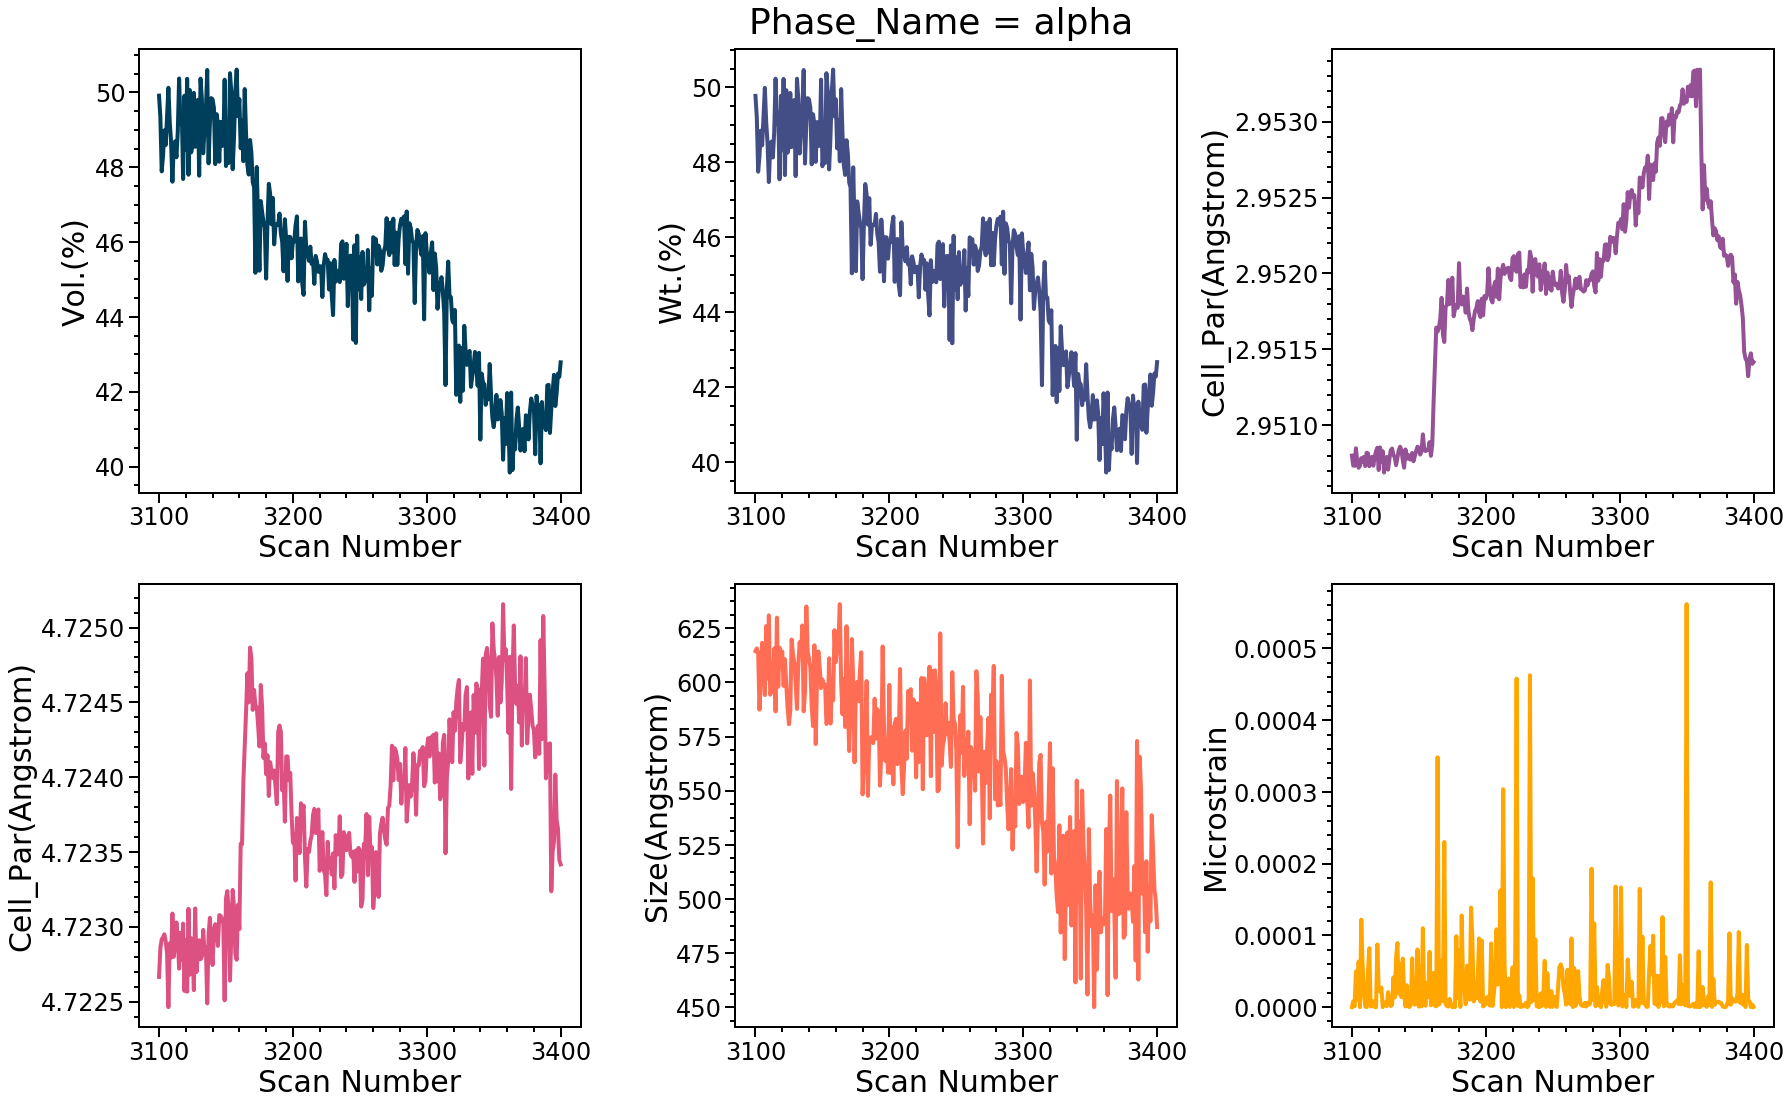

In [29]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3, figsize = (25, 15))

colour = '#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54', '#ffa600'

ax1.minorticks_on()
ax1.plot(test_number, volume, color = colour[0], linewidth = 4)
# ax1.set_title(header[3], fontsize = 30)
ax1.set_xlabel('Scan Number', fontsize = 30)
ax1.set_ylabel(header[3], fontsize = 30)

ax2.minorticks_on()
ax2.plot(test_number, weight_percent, color = colour[1], linewidth = 4)
# ax2.set_title(header[5], fontsize = 30)
ax2.set_xlabel('Scan Number', fontsize = 30)
ax2.set_ylabel(header[5], fontsize = 30)

ax3.minorticks_on()
ax3.plot(test_number, cell_par_a, color = colour[2], linewidth = 4)
# ax3.set_title(header[7], fontsize = 30)
ax3.set_xlabel('Scan Number', fontsize = 30)
ax3.set_ylabel(header[7], fontsize = 30)

ax4.minorticks_on()
ax4.plot(test_number, cell_par_c, color = colour[3], linewidth = 4)
# ax4.set_title(header[8], fontsize = 30)
ax4.set_xlabel('Scan Number', fontsize = 30)
ax4.set_ylabel(header[8], fontsize = 30)

ax5.minorticks_on()
ax5.plot(test_number, size, color = colour[4], linewidth = 4)
# ax5.set_title(header[9], fontsize = 30)
ax5.set_xlabel('Scan Number', fontsize = 30)
ax5.set_ylabel(header[9], fontsize = 30)

ax6.minorticks_on()
ax6.plot(test_number, microstrain, color = colour[5], linewidth = 4)
# ax6.set_title(header[10], fontsize = 30)
ax6.set_xlabel('Scan Number', fontsize = 30)
ax6.set_ylabel(header[10], fontsize = 30)

fig.suptitle(header[2] + ' = ' + phase, x = 0.525, y = 1.02, fontsize = 36)

fig.tight_layout()

Plot the errors for the volume and weight percent for the $\alpha$ phase:

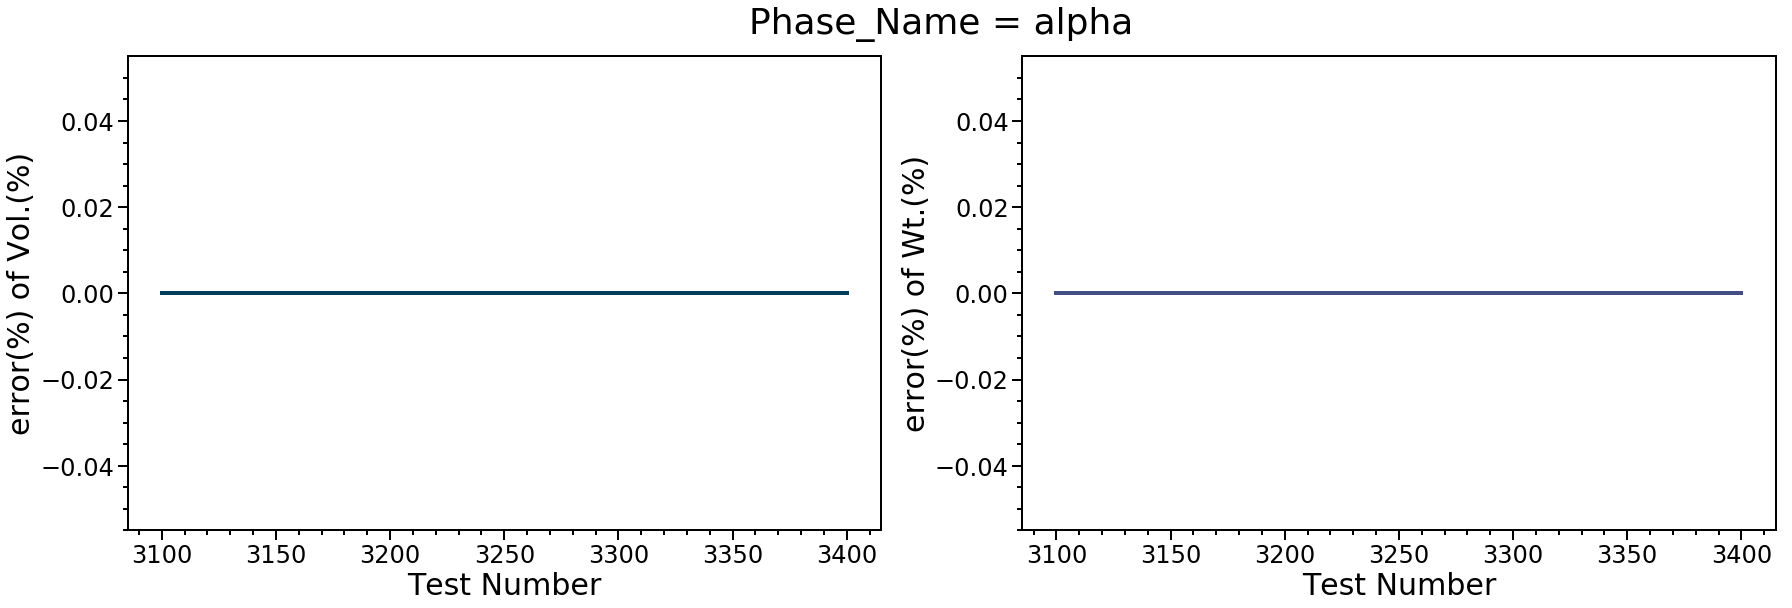

In [19]:
fig, ((ax1,ax2)) = plt.subplots(1, 2, figsize = (25, 8))

ax1.minorticks_on()
ax1.plot(test_number, vol_error, color = colour[0], linewidth = 4)
# ax1.set_title(header[4] + ' of ' + results_header[3], fontsize = 30)
ax1.set_xlabel('Scan Number', fontsize = 30)
ax1.set_ylabel(header[4] + ' of ' + header[3], fontsize = 30)

ax2.minorticks_on()
ax2.plot(test_number, weight_error, color = colour[1], linewidth = 4)
# ax2.set_title(header[6] + ' of ' + results_header[5], fontsize = 30)
ax2.set_xlabel('Scan Number', fontsize = 30)
ax2.set_ylabel(header[6] + ' of ' + header[5], fontsize = 30)

fig.suptitle(header[2] + ' = ' + phase, x = 0.525, y = 1.05, fontsize = 36)

fig.tight_layout()

Plot the volume, weight percent, a cell parameter, size and microstrain for the $\beta$ phase:

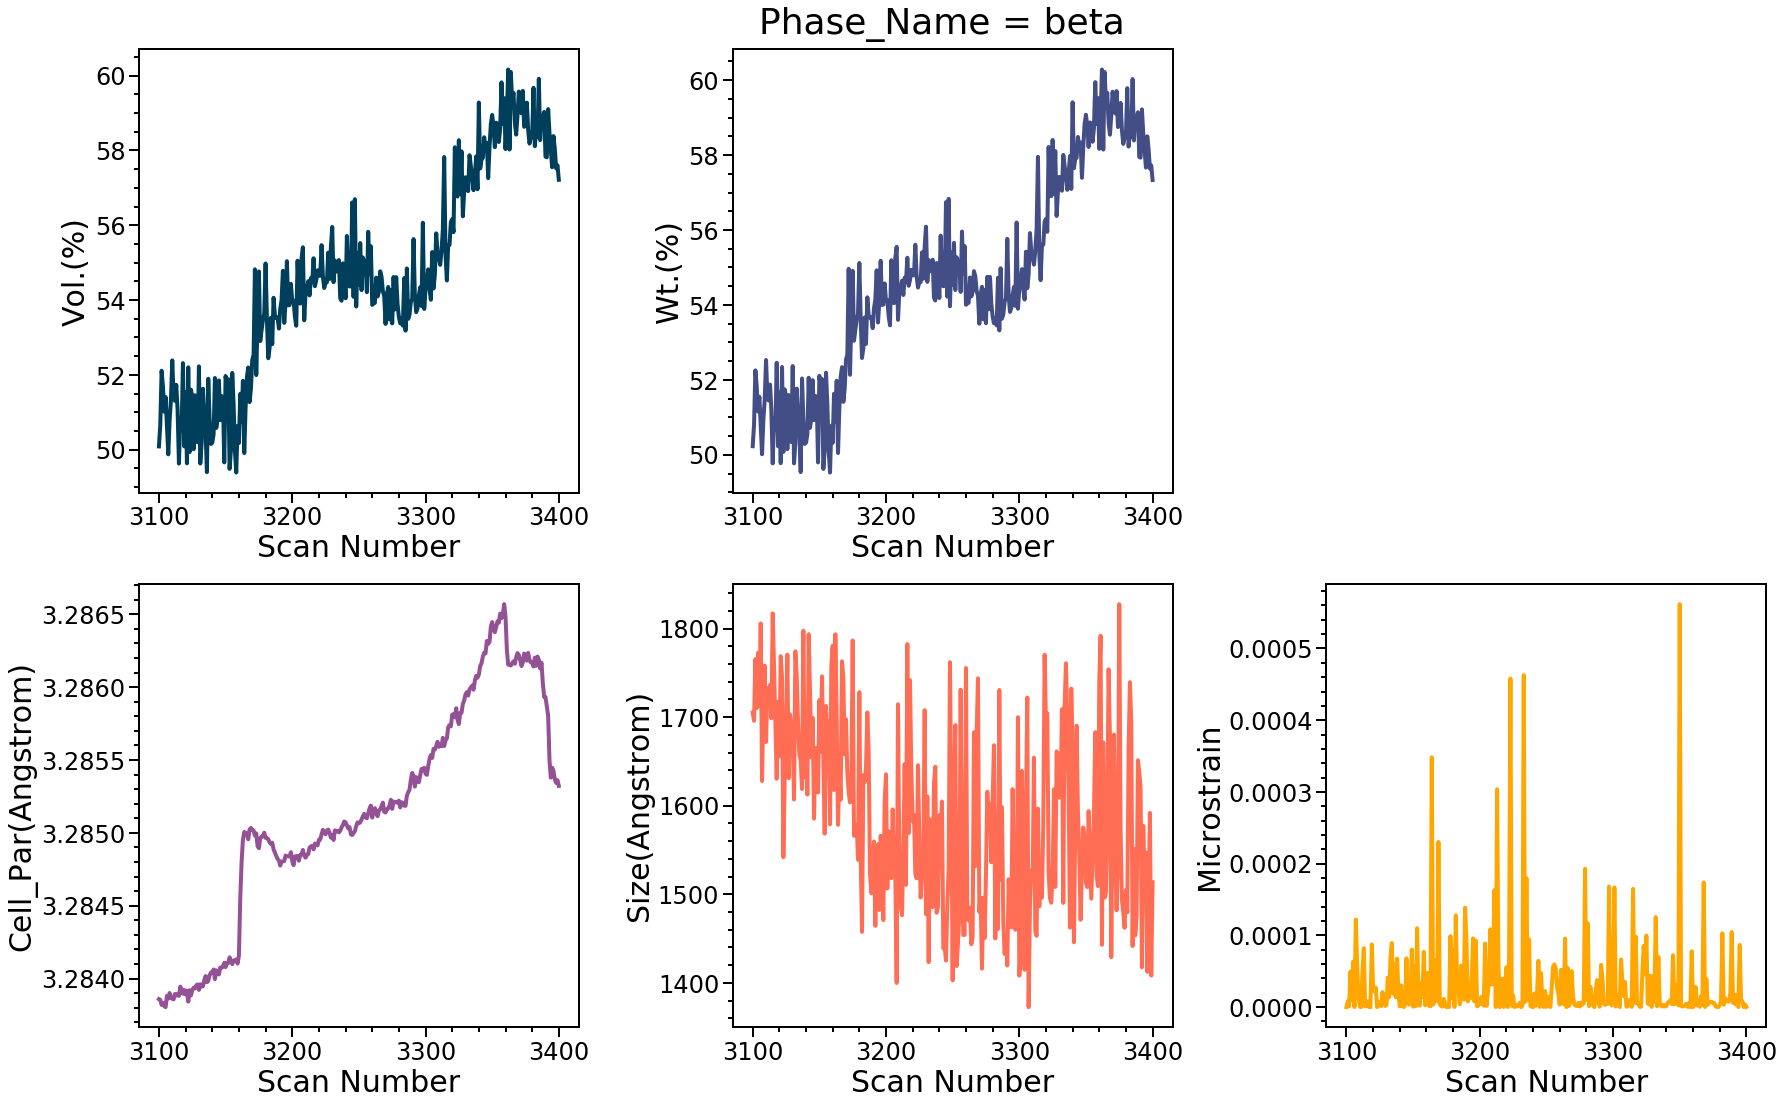

In [30]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3, figsize = (25, 15))

ax1.minorticks_on()
ax1.plot(test_number, volume2, color = colour[0], linewidth = 4)
# ax1.set_title(header[12], fontsize = 30)
ax1.set_xlabel('Scan Number', fontsize = 30)
ax1.set_ylabel(header[12], fontsize = 30)

ax2.minorticks_on()
ax2.plot(test_number, weight_percent2, color = colour[1], linewidth = 4)
# ax2.set_title(header[14], fontsize = 30)
ax2.set_xlabel('Scan Number', fontsize = 30)
ax2.set_ylabel(header[14], fontsize = 30)

ax3.axis('off') # since there is only one cell parameter for the beta phase

ax4.minorticks_on()
ax4.plot(test_number, cell_par_a2, color = colour[2], linewidth = 4)
# ax4.set_title(header[16], fontsize = 30)
ax4.set_xlabel('Scan Number', fontsize = 30)
ax4.set_ylabel(header[16], fontsize = 30)

ax5.minorticks_on()
ax5.plot(test_number, size2, color = colour[4], linewidth = 4)
# ax5.set_title(header[17], fontsize = 30)
ax5.set_xlabel('Scan Number', fontsize = 30)
ax5.set_ylabel(header[17], fontsize = 30)

ax6.minorticks_on()
ax6.plot(test_number, microstrain, color = colour[5], linewidth = 4)
# ax6.set_title(header[18], fontsize = 30)
ax6.set_xlabel('Scan Number', fontsize = 30)
ax6.set_ylabel(header[18], fontsize = 30)

fig.suptitle(header[11] + ' = ' + phase2, x = 0.525, y = 1.02, fontsize = 36)

fig.tight_layout()

Plot the errors for the volume and weight percent for the $\beta$ phase:

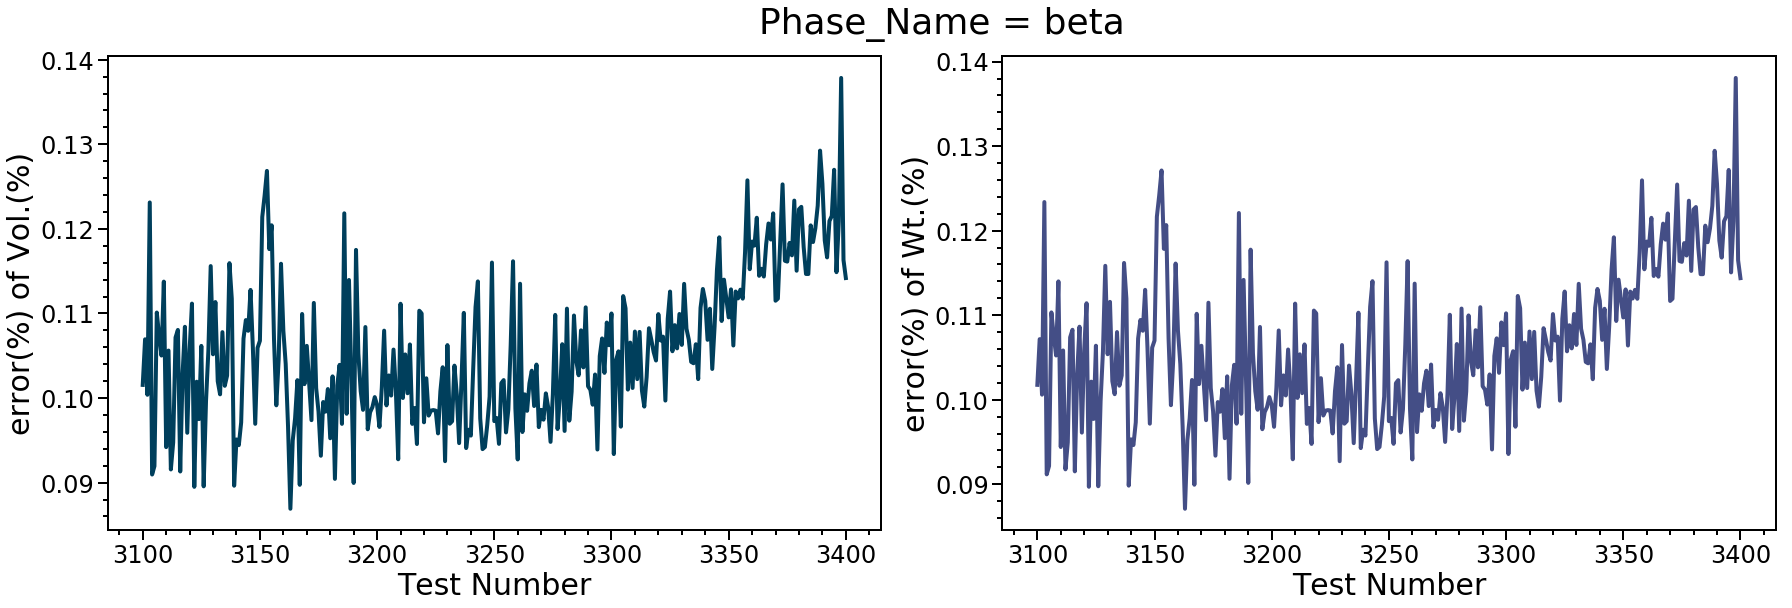

In [17]:
fig, ((ax1,ax2)) = plt.subplots(1, 2, figsize = (25, 8))

ax1.minorticks_on()
ax1.plot(test_number, vol_error2, color = colour[0], linewidth = 4)
# ax1.set_title(header[13] + ' of ' + results_header[3], fontsize = 30)
ax1.set_xlabel('Scan Number', fontsize = 30)
ax1.set_ylabel(header[13] + ' of ' + header[3], fontsize = 30)

ax2.minorticks_on()
ax2.plot(test_number, weight_error2, color = colour[1], linewidth = 4)
# ax2.set_title(header[15] + ' of ' + results_header[5], fontsize = 30)
ax2.set_xlabel('Scan Number', fontsize = 30)
ax2.set_ylabel(header[15] + ' of ' + header[5], fontsize = 30)

fig.suptitle(header[11] + ' = ' + phase2, x = 0.525, y = 1.05, fontsize = 36)

fig.tight_layout()

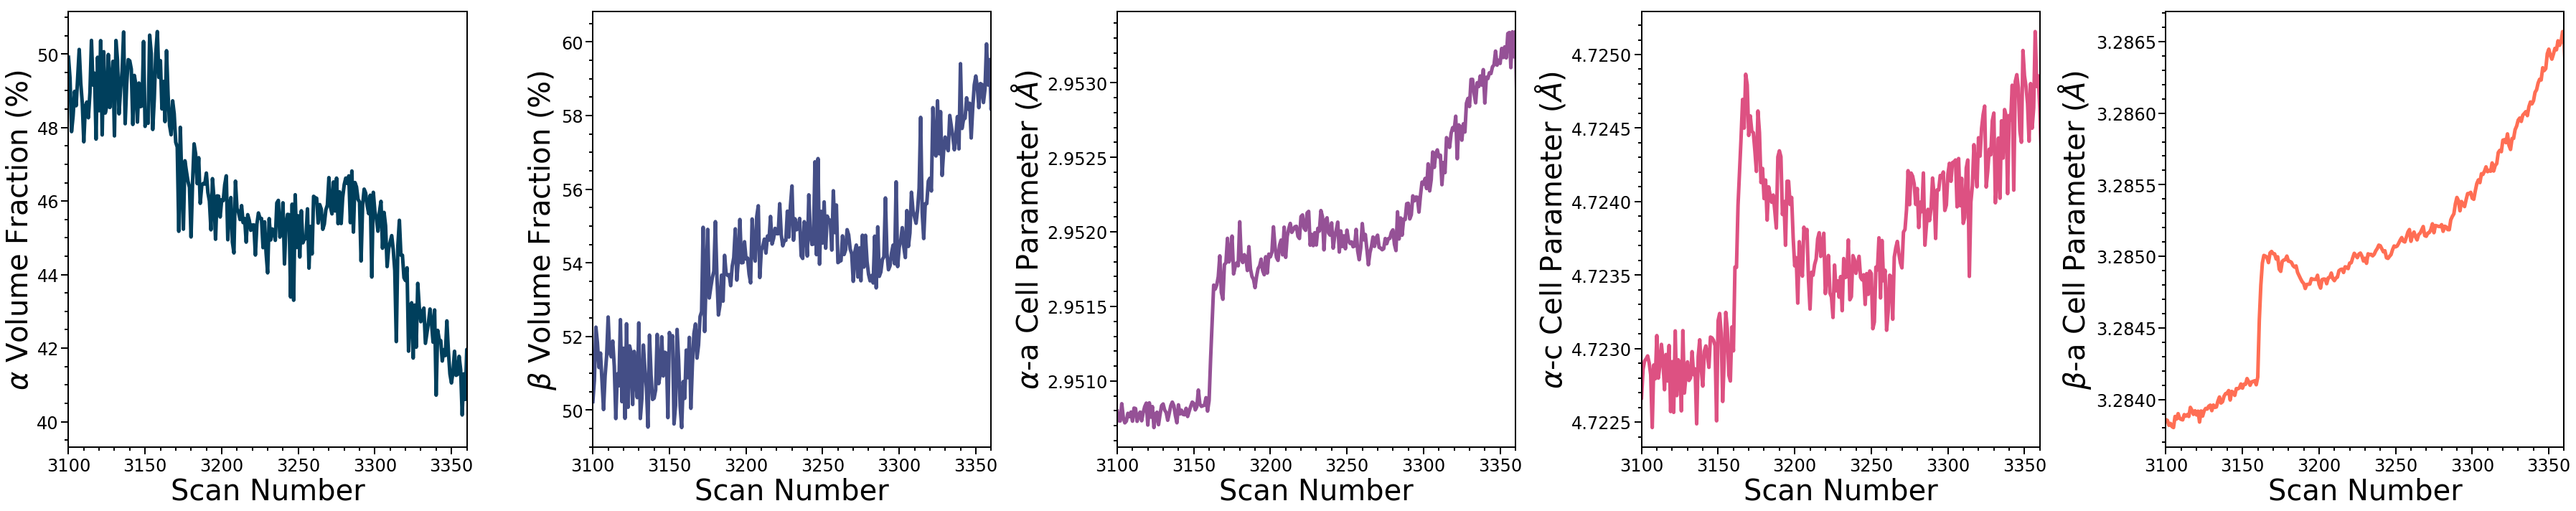

In [60]:
fig, ((ax1,ax2,ax3,ax4,ax5)) = plt.subplots(1, 5, figsize = (50, 10))

colour = '#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54', '#ffa600'

ax1.minorticks_on()
ax1.plot(test_number, volume, color = colour[0], linewidth = 5)
# ax1.set_title(header[3], fontsize = 30)
ax1.set_xlabel('Scan Number', fontsize = 40)
ax1.set_ylabel(r'$\alpha$ Volume Fraction (%)', fontsize = 40)
ax1.set_xlim(3100,3360)

ax2.minorticks_on()
ax2.plot(test_number, weight_percent2, color = colour[1], linewidth = 5)
# ax2.set_title(header[14], fontsize = 30)
ax2.set_xlabel('Scan Number', fontsize = 40)
ax2.set_ylabel(r'$\beta$ Volume Fraction (%)', fontsize = 40)
ax2.set_xlim(3100,3360)

ax3.minorticks_on()
ax3.plot(test_number, cell_par_a, color = colour[2], linewidth = 5)
# ax3.set_title(header[7], fontsize = 30)
ax3.set_xlabel('Scan Number', fontsize = 40)
ax3.set_ylabel(r'$\alpha$-a Cell Parameter ($\AA$)', fontsize = 40)
ax3.set_xlim(3100,3360)

ax4.minorticks_on()
ax4.plot(test_number, cell_par_c, color = colour[3], linewidth = 5)
# ax4.set_title(header[8], fontsize = 30)
ax4.set_xlabel('Scan Number', fontsize = 40)
ax4.set_ylabel(r'$\alpha$-c Cell Parameter ($\AA$)', fontsize = 40)
ax4.set_xlim(3100,3360)

ax5.minorticks_on()
ax5.plot(test_number, cell_par_a2, color = colour[4], linewidth = 5)
# ax5.set_title(header[16], fontsize = 30)
ax5.set_xlabel('Scan Number', fontsize = 40)
ax5.set_ylabel(r'$\beta$-a Cell Parameter ($\AA$)', fontsize = 40)
ax5.set_xlim(3100,3360)

fig.tight_layout()

fig.savefig("../results/diamond_2017/065_15deg/parameters.png")

## Writing the ODF for plotting in MTEX

The .par analysis file contains the ODF data. We find the data after the line '_rita_wimv_odf_values'. It is in the form of **Euler angles using the Matthies convention**.

In [23]:
def write_odf_to_text(start: int, end: int, step: int, test_number: int, phase: str, number_of_iterations: int,
                 output_folder: str, odf_resolution: int):
    """This function searches for the odf within refined MAUD analysis '.par' files and 
    writes the recorded intensities to a text file that is readable in MTEX.
    """
    
    for image_number in tqdm(range(start, end + 1, step)):

        # input refined MAUD analysis file
        input_path = f'../analysis/diamond_2021/{test_number:06d}-stage-scan/15deg/{test_number:06d}_{image_number:05d}_{phase}_{number_of_iterations}iter.par'
        #input_path = f'../analysis/diamond_2021/{test_number:06d}/15deg/{test_number:06d}_summed.par'
        #input_path = f'../analysis/diamond_2021/103840-103845-combined/15deg/combined_103840-103845.par'
        #input_path = f'../analysis/diamond_2017/{test_number:03d}_15deg/{test_number:03d}_{image_number:05d}_{phase}_{number_of_iterations}iter.par'
        
        # output ODF text file to load into MTEX
        output_path = f'{output_folder}/ODF_{test_number:06d}_{image_number:05d}_{phase}_{number_of_iterations}iter.txt'
        #output_path = f'{output_folder}/ODF_{test_number:06d}_{phase}.txt'
        #output_path = f'{output_folder}/ODF_combined_103840-103845_{phase}.txt'
        #output_path = f'{output_folder}/ODF_{test_number:03d}_{image_number:05d}_{phase}_{number_of_iterations}iter.txt'

        with open(input_path, 'r') as par_analysis_file, open(output_path, 'w') as odf_text_file:  
            line = par_analysis_file.readline()

            if phase == 'alpha':
                skip = False
            if phase == 'beta':
                skip = True

            while line:
                if '_rita_wimv_odf_values' in line and skip:
                    line = par_analysis_file.readline()
                    skip = False

                if '_rita_wimv_odf_values' in line and skip == False:
                    # set the step size to loop through the data
                    step = odf_resolution / 10
                    # set the limits of the data
                    block_limit = int(7/step)+1
                    row_limit = int(10/step)+1
                    value_limit = int(37/step)+1
                    
#                     print(block_limit)
#                     print(row_limit)
#                     print(value_limit)
                    
                    for block in range(0, block_limit):

                        if block <= block_limit:

                            for row in range (0, row_limit):
                                # read the data into an array 
                                intensity = par_analysis_file.readline().split()

                                if row <= row_limit:

                                    for value in range (0, value_limit):
                                        # euler3 is 0 - 60 deg
                                        euler3 = block * odf_resolution
                                        # euler2 is 0 - 90 deg
                                        euler2 = row * odf_resolution
                                        # euler1 is 0 - 360 deg
                                        euler1 = value * odf_resolution
                                        # write the odf text file
                                        odf_text_file.write('{:.4f}\t{:.4f}\t{:.4f}\t{:.9f}\n'.format(euler1, euler2, euler3, float(intensity[value])))     

                                # skip blank line after the last row of each block
                                # note, else if statement not applicable as both conditions needed
                                if row == row_limit - 1:
                                    par_analysis_file.readline()

                        # break after the last block
                        if block == block_limit - 1:
                            done = True
                            
                    if done:break

                else:
                    line = par_analysis_file.readline()

    print(f"Written {int((end + 1 - start) / step)} ODF .txt files to '{output_folder}' folder.")  

In [25]:
# test number is put in the name of the input and output file
test_number = 103845

# which phase?
#phase = 'alpha'
phase = 'beta'

# number of refinement iterations
number_of_iterations = 5

# number and spacing of files to read
start = 260
end = 300
step = 1

# set the resolution of the ODF as defined in MAUD, which defines the steps in euler angles in the ODF data.
odf_resolution = 15

# where the ODF .txt files are written
output_folder = pathlib.Path(f"../results/diamond_2021/{test_number:05d}-stage-scan/{test_number:05d}_ODF_data/15deg/{phase}")

write_odf_to_text(start, end, step, test_number, phase, number_of_iterations, output_folder, odf_resolution)


Written 27 ODF .txt files to '../results/diamond_2021/103845-stage-scan/103845_ODF_data/15deg/beta' folder.


In [36]:
# test number is put in the name of the input and output file
test_number = 103840

# which phase?
phase = 'alpha'
#phase = 'beta'

# number of refinement iterations
number_of_iterations = 5

# number and spacing of files to read
start = 1
end = 1
step = 1

# set the resolution of the ODF as defined in MAUD, which defines the steps in euler angles in the ODF data.
odf_resolution = 15

# where the ODF .txt files are written
output_folder = pathlib.Path(f"../results/diamond_2021/{test_number:05d}/{test_number:05d}_ODF_data/15deg/{phase}")

write_odf_to_text(start, end, step, test_number, phase, number_of_iterations, output_folder, odf_resolution)


Written 0 ODF .txt files to '../results/diamond_2021/103845/103845_ODF_data/15deg/beta' folder.


In [38]:
# test number is put in the name of the input and output file
test_number = 1

# which phase?
phase = 'alpha'
#phase = 'beta'

# number of refinement iterations
number_of_iterations = 5

# number and spacing of files to read
start = 1
end = 1
step = 1

# set the resolution of the ODF as defined in MAUD, which defines the steps in euler angles in the ODF data.
odf_resolution = 15

# where the ODF .txt files are written
output_folder = pathlib.Path(f"../results/diamond_2021/103840-103845-combined/combined_ODF_data/15deg/{phase}")

write_odf_to_text(start, end, step, test_number, phase, number_of_iterations, output_folder, odf_resolution)


Written 0 ODF .txt files to '../results/diamond_2021/103840-103845-combined/combined_ODF_data/15deg/beta' folder.


In [21]:
# test number is put in the name of the input and output file
test_number = 65

# which phase?
#phase = 'alpha'
phase = 'beta'

# number of refinement iterations
number_of_iterations = 20

# number and spacing of files to read
start = 3100
end = 3400
step = 1

# set the resolution of the ODF as defined in MAUD, which defines the steps in euler angles in the ODF data.
odf_resolution = 15

# where the ODF .txt files are written
output_folder = pathlib.Path(f"../results/diamond_2017/{test_number:03d}_15deg/{test_number:03d}_ODF_data/{phase}")

write_odf_to_text(start, end, step, test_number, phase, number_of_iterations, output_folder, odf_resolution)


Written 200 ODF .txt files to '../results/diamond_2017/065_15deg/065_ODF_data/beta' folder.
